# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Groupby & Aggregation Methods

groupby(); bir veri setindeki belirli bir sütuna göre gruplama yapmak için kullanılır. 

Bu işlev, verileri gruplara ayırmak ve bu gruplar üzerinde çeşitli işlemler yapmak için kullanılır.

Örneğin, bir veri kümesinde müşterilerin isimleri, yaşları ve satın aldıkları ürünler yer alıyor olabilir. groupby() işlevi kullanarak, müşterilerin satın aldıkları ürüne göre gruplandırabilir ve her ürün için ortalama yaşlarını bulabilirsiniz.

[Source01](https://towardsdatascience.com/all-pandas-groupby-you-should-know-for-grouping-data-and-performing-operations-2a8ec1327b5),
[Source02](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html),
[Source03](https://naomi-fridman.medium.com/pandas-groupby-explained-with-titanic-6a1c47eb8182)

aggregate() & agg(); bir sütuna veya sütunlara göre gruplandırılmış bir veri kümesinde farklı işlevlerin (örneğin, mean, sum, max) uygulanması için kullanılır.

[aggregate](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html),
[agg](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.core.groupby.DataFrameGroupBy.agg.html),
[SOURCE01](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/),
[SOURCE02](https://www.analyticsvidhya.com/blog/2020/03/groupby-pandas-aggregating-data-python/)

Pandas'ın aggregation yöntemleri, belirli bir veri kümesi üzerinde işlemler gerçekleştirerek bir sonuç döndürür. 

Bu yöntemler, bir veri kümesindeki değerleri toplama, ortalama alma, en büyük veya en küçük değeri bulma gibi farklı işlemleri gerçekleştirir. 


Pandas'ın aggregation yöntemlerinden bazıları şunlardır:

**sum():** Belirtilen sütunda yer alan tüm değerlerin toplamını döndürür.

**mean():** Belirtilen sütunda yer alan tüm değerlerin ortalamasını döndürür.

**median():** Gruplanmış verilerin medyanını hesaplar.

**mode()** Belirtilen sütunda en çok tekrar eden değerleri döndürür.

**max():** Belirtilen sütunda yer alan en büyük değeri döndürür.

**min():** Belirtilen sütunda yer alan en küçük değeri döndürür.

**count():** Belirtilen sütunda yer alan toplam değer sayısını döndürür.

**std():** Belirtilen sütunda yer alan değerlerin standart sapmasını döndürür.

**var():** Belirtilen sütunda yer alan değerlerin varyansını döndürür.

**describe():** Gruplanmış verilerin istatistiksel özetini hesaplar.

**idxmin():** Belirtilen eksen boyunca minimum değeri içeren ilk indeksi döndürür.

**idxmax():** Belirtilen eksen boyunca maksimum değeri içeren ilk indeksi döndürür.

**corr():** Sütunlar  arasındaki korelasyonu, NA/null değerleri hariç tutarak hesaplar.

Bu yöntemler, bir DataFrame veya Series üzerinde kullanılabilir ve istenilen sütun veya satırlarda işlem yapılabilir. 

Pandas'ın aggregation yöntemleri, verileri hızlı ve etkili bir şekilde analiz etmek için çok kullanışlıdır.

[Pandas Official Documentation](https://pandas.pydata.org/docs/reference/frame.html)

In [2]:
data = {'Company':['Amazon', 'Amazon', 'OpenAI', 'OpenAI', 'Amazon', 'OpenAI', 'Amazon', 'OpenAI'],
        'Department':['IT', 'HR', 'IT', 'HR', 'IT', 'HR', 'HR', 'IT'],
        'Person':['Ahmet', 'Ece', 'Fatma', 'Mehmet', 'Zeynep', 'Ali', 'Yusuf', 'Elif'],
        'Age':[32, 26, 35, 40, 25, 38, 30, 28],
        'Sales':[180, 160, 150, 180, 240, 200, 220, 160]}

In [3]:
df = pd.DataFrame(data)
df

,Company,Department,Person,Age,Sales
0,Amazon,IT,Ahmet,32,180
1,Amazon,HR,Ece,26,160
2,OpenAI,IT,Fatma,35,150
3,OpenAI,HR,Mehmet,40,180
4,Amazon,IT,Zeynep,25,240
5,OpenAI,HR,Ali,38,200
6,Amazon,HR,Yusuf,30,220
7,OpenAI,IT,Elif,28,160


In [129]:
df.agg([sum,min])
# agg() aggregate in kisaltmasidir. 
# [sum] dataframe tarzinda getirdi. Numeric degerleri topladi. Objectleri concat yapti.
# [min] Numeric degerlerdi en kucuk degeri getirdi, Object olanlarda ascii degeri en kucuk olani getirdi

,Company,Department,Person,Age,Sales
sum,AmazonAmazonOpenAIOpenAIAmazonOpenAIAmazonOpenAI,ITHRITHRITHRHRIT,AhmetEceFatmaMehmetZeynepAliYusufElif,254,1490
min,Amazon,HR,Ahmet,25,150


In [130]:
df.agg({"Age":sum,"Sales":min}) # series gorunumunde getirdi

Age      254
Sales    150
dtype: int64

In [131]:
df.agg({"Age":[sum],"Sales":[min]}) 
# DataFrame gorunumunde getirdi. Age sutununun degerlerini topladi, Sales sutununun min degerini getirdi

,Age,Sales
sum,254.0,NaN
min,NaN,150.0


In [132]:
df.agg({"Age":[sum,"mean"],"Sales":[min,max]}) 
# Burada ayni sutuna farkli methodlar uygulayabiliriz.
# mean methodunun ozel bir durumu var o yuzden "mean" veya np.mean seklinde yazmaliyiz

,Age,Sales
sum,254.00,NaN
mean,31.75,NaN
min,NaN,150.0
max,NaN,240.0


In [133]:
df.groupby("Company").mean() 
# Company sutunundaki verilerin ayni olanlarini grupladi ve bu gruplarin sayisal veri sutunlarinin ortalamasini aldi

,Age,Sales
Company,,
Amazon,28.25,200.0
OpenAI,35.25,172.5


In [134]:
df.groupby("Company")[["Sales"]].mean() 
# [["Sales"]] bu sekilde yazarak Company sutununa gore grupla sadece istedigimiz sutuna istedigimiz methodu uygulayabiliriz.

,Sales
Company,
Amazon,200.0
OpenAI,172.5


In [135]:
df.groupby("Company")[["Company"]].count()  # Company sutununa gore grupla ve Company sutunundaki gruplarin elemanlarini say

,Company
Company,
Amazon,4
OpenAI,4


In [136]:
df.Company.value_counts() # Series tarzinda gruplayip saydirdi

Amazon    4
OpenAI    4
Name: Company, dtype: int64

In [137]:
df.groupby(["Company","Department"]).mean()
# burada once Company sutununa gore grupladi sonra Departman sutununa gore grupladi herbir grubun sayisal sutunlarinin
# ortalamasini buldu

Age  Sales
Company Department             
Amazon  HR          28.0  190.0
        IT          28.5  210.0
OpenAI  HR          39.0  190.0
        IT          31.5  155.0

In [138]:
df.Sales.min()

150

In [139]:
df.groupby("Company")[["Sales"]].idxmin()
# Company sutununa gore grupla her bir grubun Sales sutununun en kucuk degerinin ilk indexlerini getir
# **idxmin():** Belirtilen eksen boyunca minimum değeri içeren ilk indeksi döndürür.

,Sales
Company,
Amazon,1
OpenAI,2


In [140]:
df.groupby("Company")[["Sales"]].idxmax()
# Company sutununa gore grupla her bir grubun Sales sutununun en buyuk degerinin ilk indexlerini getir
# **idxmax():** Belirtilen eksen boyunca maksimum değeri içeren ilk indeksi döndürür.

,Sales
Company,
Amazon,4
OpenAI,5


In [141]:
compare = df.groupby("Company") # grubumuzu bu sekilde bir variable a atayabiliriz

In [142]:
compare.corr()
# corr() df nin corelasyon degerini getirir. Colerasyon degiskenlerin birbirini etkileme durumu, iliskisi 
# corr(), 1 e yaklastikca pozitif iliski(dogru oranti), -1 e yaklastikca negatif iliski(ters oranti) artar
# yani sonuc 1'e veya -1'e yaklastikca iliski artar

Age     Sales
Company                          
Amazon  Age    1.000000 -0.221032
        Sales -0.221032  1.000000
OpenAI  Age    1.000000  0.593934
        Sales  0.593934  1.000000

# Useful Operations

## filter()

filter(): Verileri belirli bir koşula göre filtreler.

[Pandas Official Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.filter.html),
[SOURCE01](https://www.sharpsightlabs.com/blog/pandas-filter/),
[SOURCE02](https://appdividend.com/2020/03/19/pandas-filter-pandas-dataframe-filter-in-python-example/)

In [143]:
df

,Company,Department,Person,Age,Sales
0,Amazon,IT,Ahmet,32,180
1,Amazon,HR,Ece,26,160
2,OpenAI,IT,Fatma,35,150
3,OpenAI,HR,Mehmet,40,180
4,Amazon,IT,Zeynep,25,240
5,OpenAI,HR,Ali,38,200
6,Amazon,HR,Yusuf,30,220
7,OpenAI,IT,Elif,28,160


In [144]:
df.filter(["Company","Age"])
# biz bunu daha kolay olan df[["Company","Age"]] yontemiyle de yapiyoruz

,Company,Age
0,Amazon,32
1,Amazon,26
2,OpenAI,35
3,OpenAI,40
4,Amazon,25
5,OpenAI,38
6,Amazon,30
7,OpenAI,28


In [145]:
df.filter(regex="^Com", axis=1)
# ^ isareti Karakter dizisi baslangici demek
# $ isareti Karakter dizisi sonu demek
# bu kodda Com ile baslayan sutunlari ve verilerini getir. Burada sutun olmasina axis =1 ile karar veriyoruz

,Company
0,Amazon
1,Amazon
2,OpenAI
3,OpenAI
4,Amazon
5,OpenAI
6,Amazon
7,OpenAI


In [146]:
df.filter(like = "art", axis = 1) # sutun isimleri icinde "art" olan sutunu ve verilerini getir.
                                  # axis = 1 old. icin sutun isimlerine bakti

,Department
0,IT
1,HR
2,IT
3,HR
4,IT
5,HR
6,HR
7,IT


In [147]:
df.filter(like="3", axis = 0) # satir numarasinda 3 olan satirlari ve verilerini getir. axis = 0 old. icin satirlara bakti

,Company,Department,Person,Age,Sales
3,OpenAI,HR,Mehmet,40,180


In [148]:
df.filter(like="A", axis = 1) # axis =1 old. icin sutun isimleri icinde "A" harfi olanlari getir

,Age
0,32
1,26
2,35
3,40
4,25
5,38
6,30
7,28


In [149]:
df.groupby("Company").mean() 
# Company sutununa gore grupladi ve sonrasinda herhangi bir sutun belirtmedigim icin numeric sutunlarin ortalamsini aldi

,Age,Sales
Company,,
Amazon,28.25,200.0
OpenAI,35.25,172.5


In [150]:
df.groupby("Company").filter(lambda x : x["Age"].mean() < 30)
#Company sutuna gore grupladi ve "Age" sutununa gore gruplarin ortlamasi 30 dan kucuk olanlarin elemanlarini getir
# burada Amazon grubunun Age ortalamsi 28.25<30 oldugu icin Amazon un elemanlarini getirdi, OpenAl 35.25> 30 old.icin getirmedi

,Company,Department,Person,Age,Sales
0,Amazon,IT,Ahmet,32,180
1,Amazon,HR,Ece,26,160
4,Amazon,IT,Zeynep,25,240
6,Amazon,HR,Yusuf,30,220


In [151]:
df.groupby("Company").filter(lambda x : x["Age"].mean() < 36)
# burada Amazon ve OpenAl in Age ortalamalari 36 dan kucuk old. icin ikisininde elemanlarini getirdi

,Company,Department,Person,Age,Sales
0,Amazon,IT,Ahmet,32,180
1,Amazon,HR,Ece,26,160
2,OpenAI,IT,Fatma,35,150
3,OpenAI,HR,Mehmet,40,180
4,Amazon,IT,Zeynep,25,240
5,OpenAI,HR,Ali,38,200
6,Amazon,HR,Yusuf,30,220
7,OpenAI,IT,Elif,28,160


In [152]:
(lambda x : x["Age"].mean() < 30)(df.groupby("Company"))
# bu sekilde yazim True False olarak istenileni dondurdu

Company
Amazon     True
OpenAI    False
Name: Age, dtype: bool

## transform()

transform(), bir pandas DataFrame ya da Serisi'ndeki verileri değiştirmek veya dönüştürmek için kullanılan bir yöntemdir. 

Belirtilen işlevi uygular ve sonucu yeni bir Seri veya DataFrame olarak döndürür.

Özellikle gruplama işlemleri ile birlikte kullanıldığında oldukça yararlıdır.

[SOUREC01](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transform.html) & [SOURCE02](https://www.analyticsvidhya.com/blog/2020/03/understanding-transform-function-python/)

In [153]:
data = {'Company':['Amazon', 'Amazon', 'OpenAI', 'OpenAI', 'Amazon', 'OpenAI', 'Amazon', 'OpenAI'],
        'Department':['IT', 'HR', 'IT', 'HR', 'IT', 'HR', 'HR', 'IT'],
        'Person':['Ahmet', 'Ece', 'Fatma', 'Mehmet', 'Zeynep', 'Ali', 'Yusuf', 'Elif'],
        'Age':[32, 26, 35, 40, 25, 38, 30, 28],
        'Sales':[180, 160, 150, 180, 240, 200, 220, 160]}
df = pd.DataFrame(data)
df

,Company,Department,Person,Age,Sales
0,Amazon,IT,Ahmet,32,180
1,Amazon,HR,Ece,26,160
2,OpenAI,IT,Fatma,35,150
3,OpenAI,HR,Mehmet,40,180
4,Amazon,IT,Zeynep,25,240
5,OpenAI,HR,Ali,38,200
6,Amazon,HR,Yusuf,30,220
7,OpenAI,IT,Elif,28,160


In [154]:
df_num =df.iloc[: , 3:] # [satir, sutun] # tum satirlari sutunlarin da 3.indexinden sona kadar olanlarini df_num a atadik
df_num

,Age,Sales
0,32,180
1,26,160
2,35,150
3,40,180
4,25,240
5,38,200
6,30,220
7,28,160


In [155]:
df_num.Sales.transform(np.exp) 
# np.exp --> exp() fonksiyonu, euler sayısı veya e sayısı sabiti sayısının üslerini x değeri kadar döndürür.
# Euler sayısı sabiti 2.718281828459045 reel sayısıdır. 
# Bu fonksiyon taban olarak aldığı bu sayının x kadar üssünü döndürür.

0     1.489384e+78
1     3.069850e+69
2     1.393710e+65
3     1.489384e+78
4    1.700888e+104
5     7.225974e+86
6     3.505791e+95
7     3.069850e+69
Name: Sales, dtype: float64

In [156]:
df_num.Sales.transform(np.sqrt) 
# Sales sutunundaki her bir verinin karekokunu al ve getir
# df_num.Sales.agg(np.sqrt) bu sekilde de ayni sonuca ulasiriz

0    13.416408
1    12.649111
2    12.247449
3    13.416408
4    15.491933
5    14.142136
6    14.832397
7    12.649111
Name: Sales, dtype: float64

In [157]:
df.groupby("Company")[["Age"]].mean() # Company e gore grupladi her grubun ortalamasini aldi

,Age
Company,
Amazon,28.25
OpenAI,35.25


In [158]:
df.groupby("Company")[["Age"]].transform("mean")
# Company sutununa gore verileri grupla her grubun yaslarinin ortalamasini al ve her grubun elemanina kendi grubunun ortalamasini ata
# bir ust satirdaki kodda da goruldugu gibi gruplarimiz Amazon ve OpenAl ve ortalamalari bulundu.
# Amazon olanlarin yaslarinin ortalamasini kendi elemanlarinin yaslarina atadi. OpenAl da ayni sekilde

,Age
0,28.25
1,28.25
2,35.25
3,35.25
4,28.25
5,35.25
6,28.25
7,35.25


## apply() & applymap() & map()

apply(): DataFrame veya Seri üzerinde bir satır veya sütun boyunca bir işlem yapmak için kullanılır.

applymap(): DataFrame'in tamamı üzerinde öğe bazında işlem için kullanılır.

map(): Yalnızca Seri lerde kullanılabilir ve Seri nin her bir elemanına uygulanacak bir işlem için kullanılır.

[apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html)
[applymap](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.applymap.html)
[map](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html)

[SOUREC01](https://www.geeksforgeeks.org/python-pandas-apply/), 
[SOURCE02](https://www.datacamp.com/community/tutorials/pandas-apply),
[SOURCE03](https://sparkbyexamples.com/pandas/pandas-apply-function-usage-examples/),
[SOURCE04](https://realpython.com/python-map-function/#:~:text=Python's%20map()%20is%20a,them%20into%20a%20new%20iterable.),
[SOURCE05](https://www.w3resource.com/pandas/series/series-map.php),
[SOURCE06](https://towardsdatascience.com/introduction-to-pandas-apply-applymap-and-map-5d3e044e93ff#:~:text=apply()%20is%20used%20to,a%20Series%20with%20another%20value.),
[SOURCE07](https://stackoverflow.com/questions/19798153/difference-between-map-applymap-and-apply-methods-in-pandas) &
[SOURCE08](https://medium.com/@akaivdo/how-to-use-map-apply-applymap-methods-in-pandas-ddde5f2140bd)

In [5]:
data = {'Company':['Amazon', 'Amazon', 'OpenAI', 'OpenAI', 'Amazon', 'OpenAI', 'Amazon', 'OpenAI'],
        'Department':['IT', 'HR', 'IT', 'HR', 'IT', 'HR', 'HR', 'IT'],
        'Person':['Ahmet', 'Ece', 'Fatma', 'Mehmet', 'Zeynep', 'Ali', 'Yusuf', 'Elif'],
        'Age':[32, 26, 35, 40, 25, 38, 30, 28],
        'Sales':[180, 160, 150, 180, 240, 200, 220, 160]}

df = pd.DataFrame(data)
df

,Company,Department,Person,Age,Sales
0,Amazon,IT,Ahmet,32,180
1,Amazon,HR,Ece,26,160
2,OpenAI,IT,Fatma,35,150
3,OpenAI,HR,Mehmet,40,180
4,Amazon,IT,Zeynep,25,240
5,OpenAI,HR,Ali,38,200
6,Amazon,HR,Yusuf,30,220
7,OpenAI,IT,Elif,28,160


In [6]:
df_num = df.iloc[:,3:]

df_num

,Age,Sales
0,32,180
1,26,160
2,35,150
3,40,180
4,25,240
5,38,200
6,30,220
7,28,160


In [161]:
df_num.applymap(lambda x: x * 10) # applymap() icine verilen kurali her sutunun her bir elemanina uyguladi

,Age,Sales
0,320,1800
1,260,1600
2,350,1500
3,400,1800
4,250,2400
5,380,2000
6,300,2200
7,280,1600


In [162]:
df_num.transform(lambda x: x * 10) # transform() icine verilen kurali her sutunun her bir elemanina uyguladi

,Age,Sales
0,320,1800
1,260,1600
2,350,1500
3,400,1800
4,250,2400
5,380,2000
6,300,2200
7,280,1600


In [163]:
df.groupby("Company")[["Age"]].apply(np.mean)
# Company sutununa gore verileri grupla her grubun yaslarinin ortalamasini al apply() ile her gruba ortalamayi uygula
# apply() icine verilen kurali her gruba uyguladi
# transform() icine verilen kurali herbir grubun kendi kuralini herbir kendi elemanina uyguladi

,Age
Company,
Amazon,28.25
OpenAI,35.25


In [164]:
df.groupby("Company")[["Age"]].transform("mean")
# transform() icine verilen kurali herbir grubun kendi kuralini herbir kendi elemanina uyguladi

,Age
0,28.25
1,28.25
2,35.25
3,35.25
4,28.25
5,35.25
6,28.25
7,35.25


In [165]:
df.groupby("Company")["Age"].applymap("mean") 
# applymap("mean") gruplamaya uygun degil o yuzden hata verdi
# applymap() gruplama sonucu olusan verilere uygulanamiyor

AttributeError: 'SeriesGroupBy' object has no attribute 'applymap'

In [166]:
# apply() --> bir DataFrame'in satır / sütun bazında çalışır
# applymap() -->  DataFrame üzerinde eleman bazında çalışır
# map() --> bir Seri üzerinde eleman bazında çalışır

In [4]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,0.707878,0.819456,-0.851133
Ohio,-0.040170,0.223580,-1.476779
Texas,-0.609966,0.251022,-0.452117
Oregon,0.622433,-0.137106,-1.116722


In [168]:
f = lambda x: x.max() - x.min()
frame.apply(f) #axis=0 (default) herbir sutunun max degerinden min degerini cikardi ve sutunlari satir yapip o satirlara yazdirdi, kalici degil

b    2.392146
d    1.430615
e    1.985089
dtype: float64

In [169]:
frame.apply(f, axis = 1) #axis=1 old. icin herbir satirdaki max degerden min degeri cikarip satirlara yazdirdi

Utah      3.052657
Ohio      0.433569
Texas     1.244863
Oregon    3.149598
dtype: float64

In [170]:
frame.b.transform(np.square)

Utah      1.870428
Ohio      0.057409
Texas     1.049621
Oregon    0.051245
Name: b, dtype: float64

In [171]:
f = lambda x: '%.2f' % x # yuzde birler basamagina yuvarlama yapti
frame.applymap(f) # dataframe in herbir elemanina uyguladi
# Not : apply()--> icine verilen kurali axis e gore satir veya sutun bazinda bulup herbir satira veya sutuna uyguluyor
#       applymap()-->icine verilen kurali dataframe in tum elemanlarina uyguluyor
# apply() series ve dataframe de kullanilabilir
# applymap() sadece dataframe de kullanilir

,b,d,e
Utah,-1.37,1.21,-1.84
Ohio,0.24,0.44,0.00
Texas,1.02,-0.22,-0.09
Oregon,-0.23,1.17,-1.98


In [172]:
frame[['b','e']].applymap(f) # bu sekilde sadece istedigimiz sutunlar uzerinde kurali uygulatabiliriz

,b,e
Utah,-1.37,-1.84
Ohio,0.24,0.00
Texas,1.02,-0.09
Oregon,-0.23,-1.98


In [173]:
f = lambda x: '%.2f' % x
frame['e'].map(f) #map() tek bir sutundaki elemanlarla esleme yapip kurali elemanlara uygulayip dondururyor

Utah      -1.84
Ohio       0.00
Texas     -0.09
Oregon    -1.98
Name: e, dtype: object

In [174]:
df

,Company,Department,Person,Age,Sales
0,Amazon,IT,Ahmet,32,180
1,Amazon,HR,Ece,26,160
2,OpenAI,IT,Fatma,35,150
3,OpenAI,HR,Mehmet,40,180
4,Amazon,IT,Zeynep,25,240
5,OpenAI,HR,Ali,38,200
6,Amazon,HR,Yusuf,30,220
7,OpenAI,IT,Elif,28,160


In [175]:
df.applymap(lambda x: len(str(x))) #Herbir hucredeki elemanlarin data turunu str a cevir ve uzunluklarini hesapla

,Company,Department,Person,Age,Sales
0,6,2,5,2,3
1,6,2,3,2,3
2,6,2,5,2,3
3,6,2,6,2,3
4,6,2,6,2,3
5,6,2,3,2,3
6,6,2,5,2,3
7,6,2,4,2,3


In [12]:
df.apply(lambda x: len(str(x)),axis=0)
#ascii degerlerini getiriyor

Company       124
Department     95
Person        123
Age            87
Sales          97
dtype: int64

In [7]:
df

,Company,Department,Person,Age,Sales
0,Amazon,IT,Ahmet,32,180
1,Amazon,HR,Ece,26,160
2,OpenAI,IT,Fatma,35,150
3,OpenAI,HR,Mehmet,40,180
4,Amazon,IT,Zeynep,25,240
5,OpenAI,HR,Ali,38,200
6,Amazon,HR,Yusuf,30,220
7,OpenAI,IT,Elif,28,160


In [177]:
# Company ve Person sutunlarindaki tum verileri Upper yap
df[["Company","Person"]].applymap(lambda x: x.upper())
# apply() gruplandirilmis verilere deger uygular

,Company,Person
0,AMAZON,AHMET
1,AMAZON,ECE
2,OPENAI,FATMA
3,OPENAI,MEHMET
4,AMAZON,ZEYNEP
5,OPENAI,ALI
6,AMAZON,YUSUF
7,OPENAI,ELIF


In [178]:
df.Age.apply(np.log)
# df.Age.transform(np.log) ayni islemi yapti

0    3.465736
1    3.258097
2    3.555348
3    3.688879
4    3.218876
5    3.637586
6    3.401197
7    3.332205
Name: Age, dtype: float64

In [179]:
df.Person.apply(len) # Person sutunundai her bir veri kac karakterli onu yazdirir

0    5
1    3
2    5
3    6
4    6
5    3
6    5
7    4
Name: Person, dtype: int64

In [180]:
df_num

,Age,Sales
0,32,180
1,26,160
2,35,150
3,40,180
4,25,240
5,38,200
6,30,220
7,28,160


In [181]:
df_num.applymap(np.sum) #applymap() eleman bazinda calistigi icin hucrelerde tek bir eleman old. icin 
# toplama yapinca elemanin kendisini dondurdu

,Age,Sales
0,32,180
1,26,160
2,35,150
3,40,180
4,25,240
5,38,200
6,30,220
7,28,160


In [182]:
df_num.apply([np.sum],axis=0) # herbir sutundaki elemanlari topladi

,Age,Sales
sum,254,1490


In [183]:
df_num.apply([np.sum], axis=1) # herbir satirdaki elemanlari topladi

,sum
0,212
1,186
2,185
3,220
4,265
5,238
6,250
7,188


In [184]:
df.groupby("Company").transform(np.mean)

,Age,Sales
0,28.25,200.0
1,28.25,200.0
2,35.25,172.5
3,35.25,172.5
4,28.25,200.0
5,35.25,172.5
6,28.25,200.0
7,35.25,172.5


In [185]:
df.groupby("Company").apply(np.mean)

,Age,Sales
Company,,
Amazon,28.25,200.0
OpenAI,35.25,172.5


In [186]:
# map()
df.Person.map({"Ahmet" : "A", "Fatma" : "F"})

0      A
1    NaN
2      F
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
Name: Person, dtype: object

In [187]:
df

,Company,Department,Person,Age,Sales
0,Amazon,IT,Ahmet,32,180
1,Amazon,HR,Ece,26,160
2,OpenAI,IT,Fatma,35,150
3,OpenAI,HR,Mehmet,40,180
4,Amazon,IT,Zeynep,25,240
5,OpenAI,HR,Ali,38,200
6,Amazon,HR,Yusuf,30,220
7,OpenAI,IT,Elif,28,160


In [13]:
df.Department = df.Department.map({"IT" : 0, "HR" : 1}).astype(int) # Department sutununun degerlerini 1 ve 0 yaptiktan sonra data turunu de int yaptik
# sutunlarimizi sayisal degere donustururken kullanisli bir method
df

,Company,Department,Person,Age,Sales
0,Amazon,0,Ahmet,32,180
1,Amazon,1,Ece,26,160
2,OpenAI,0,Fatma,35,150
3,OpenAI,1,Mehmet,40,180
4,Amazon,0,Zeynep,25,240
5,OpenAI,1,Ali,38,200
6,Amazon,1,Yusuf,30,220
7,OpenAI,0,Elif,28,160


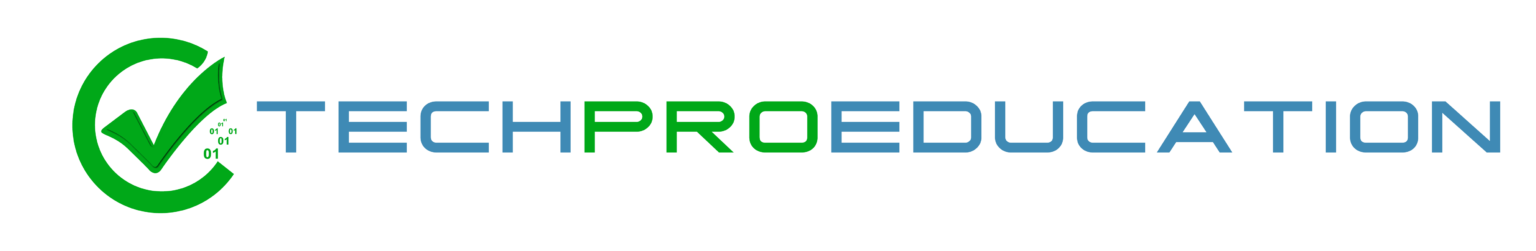